In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/drive/MyDrive/WEbmd_pro

unzip:  cannot find or open /content/drive/MyDrive/WEbmd_pro, /content/drive/MyDrive/WEbmd_pro.zip or /content/drive/MyDrive/WEbmd_pro.ZIP.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/webmd.zip')

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
data.shape

(362806, 12)

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
data['Age'].nunique()

12

In [ ]:
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

some preprocessing is needed in Age

In [ ]:
data['Condition'].nunique()

1806

In [ ]:
data['Drug'].nunique()

7093

In [ ]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [ ]:
data['Drug'].value_counts()[0:500].index

Index(['cymbalta', 'lisinopril', 'lisinopril solution', 'lexapro',
       'hydrocodone-acetaminophen', 'effexor xr', 'lyrica', 'tramadol hcl er',
       'tramadol hcl', 'zoloft',
       ...
       'ortho tri-cyclen', 'bydureon vial', 'sumatriptan succinate',
       'clobetasol propionate foam', 'clobetasol propionate lotion',
       'clobetasol propionate gel', 'clobetasol propionate spray, non-aerosol',
       'clobetasol propionate shampoo', 'avalide', 'carbamazepine'],
      dtype='object', length=500)

In [ ]:
req_drugs = data['Drug'].value_counts()[0:500].index

In [ ]:
#  data[data['Drug'].isin(req_drugs)]

In [ ]:
data2 = data[data['Drug'].isin(req_drugs)]

In [ ]:
data2['Drug'].nunique()

500

In [ ]:
data2['DrugId'].nunique()

387

In [ ]:
data2['EaseofUse'].nunique()

6

In [ ]:
data2['Effectiveness'].nunique()

6

In [ ]:
data2['Sex'].value_counts()

Female    177838
Male       71405
           17187
Name: Sex, dtype: int64

In [ ]:
data2['Sides'].nunique()

266

In [ ]:
data2['UsefulCount'].nunique()

147

In [ ]:
data2['UsefulCount'].value_counts()

0      48587
1      33587
2      25360
3      20054
4      16788
       ...  
131        1
154        1
255        1
169        1
117        1
Name: UsefulCount, Length: 147, dtype: int64

In [ ]:
data2.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
req_columns = ['Age', 'Drug', 'EaseofUse', 'Effectiveness', 'Sex', 'UsefulCount','Satisfaction']

In [ ]:
data2[req_columns]

,Age,Drug,EaseofUse,Effectiveness,Sex,UsefulCount,Satisfaction
184,,lyrica,5,5,,12,5
185,,lyrica,5,5,Male,0,5
186,65-74,lyrica,5,5,Female,0,5
187,19-24,lyrica,1,3,Female,14,1
188,35-44,lyrica,5,5,,11,5
...,...,...,...,...,...,...,...
362801,55-64,chantix,5,5,Female,2,5
362802,,chantix,2,3,,16,1
362803,25-34,chantix,2,4,Female,3,2
362804,55-64,chantix,5,5,Male,1,5


In [ ]:
data3 = data2[req_columns]

In [ ]:
data3.drop([195073, 195282],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x = data3.drop("Satisfaction",axis=1)

In [ ]:
x

,Age,Drug,EaseofUse,Effectiveness,Sex,UsefulCount
184,,lyrica,5,5,,12
185,,lyrica,5,5,Male,0
186,65-74,lyrica,5,5,Female,0
187,19-24,lyrica,1,3,Female,14
188,35-44,lyrica,5,5,,11
...,...,...,...,...,...,...
362801,55-64,chantix,5,5,Female,2
362802,,chantix,2,3,,16
362803,25-34,chantix,2,4,Female,3
362804,55-64,chantix,5,5,Male,1


In [ ]:
pd.get_dummies(x)

,EaseofUse,Effectiveness,UsefulCount,Age_,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,...,Drug_zoloft,"Drug_zolpidem spray, non-aerosol",Drug_zolpidem tartrate,Drug_zolpidem tartrate er,Drug_zomig,Drug_zyprexa,Drug_zyrtec,Sex_,Sex_Female,Sex_Male
184,5,5,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
185,5,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
186,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
187,1,3,14,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
188,5,5,11,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,5,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
362802,2,3,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
362803,2,4,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
362804,5,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = pd.get_dummies(x)

In [ ]:
def relabel(z):
  if z <=3:
    return 0
  else:
    return 1

data3["Satisfaction"] = data3["Satisfaction"].apply(relabel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
y = data3['Satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=150)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(max_depth =32)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=32)

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8598693840783695

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth = 16)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

print('Accuracy Score :',accuracy_score(y_test,y_pred)*100)


Accuracy Score : 86.10329167135833


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,r2_score,f1_score

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('r2 is',r2_score(y_test,y_pred))
print('f1 is',f1_score(y_test,y_pred))


Accuracy is 0.8620463161055437
precision is 0.8341104935278099
r2 is 0.44670301740661644
f1 is 0.858827370321292


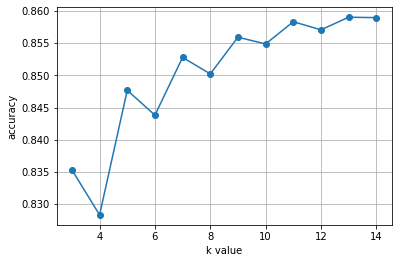

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)




plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()